# import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing  import StandardScaler
import math
from scipy import stats

# các bước xử lí:
+ bước 1: đọc dữ liệu, xem tổng quan dữ liệu
    + xem info
    + xem head
    + xác định các cột dữ liệu cần dùng trong từng câu hỏi ở bước 3
+ bước 2: kiểm tra các dữ liệu và xử lí dữ liệu ngoại lai
    + kiểm tra các giá trị có liên quan đến bước 3 có rỗng hay không
    + kiểm tra dữ liệu ngoại lai có liên quan đến bước 3
    + xử lí dữ liệu ngoại lai bằng phương pháp z-score
+ bước 3: kiểm định các giả thiết
    + 1. với mức ý nghĩa 5% kiểm định giả thuyết giá bán gạo trung bình năm 2019 là 10 Lira/kg
    + 2. Với mức ý nghĩa 5% hãy kiểm định giả thuyết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau
    + 3. Vẽ biểu đồ sự biến đổi giá gạo trung bình từ năm 1/2014 đến năm 1/2019 và tìm mối liên hệ giữa giá Trà và giá Cà phê

# bước 1:

In [2]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\FoodPrice_in_Turkey.csv")

In [3]:
# info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [4]:
# head()
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [5]:
df.ProductName.unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

# với mức ý nghĩa 5% kiểm định giả thuyết giá bán gạo trung bình năm 2019 là 10 Lira/kg

In [6]:
df_rice = df[['ProductName','Month', 'Year','Price']]

In [7]:
df_rice = df_rice.loc[(df_rice['ProductName'] == 'Rice - Retail') & (df_rice['Year'] == 2019), ]

In [8]:
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 54 to 5833
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  48 non-null     object 
 1   Month        48 non-null     int64  
 2   Year         48 non-null     int64  
 3   Price        48 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.9+ KB


In [9]:
df_rice.head()

,ProductName,Month,Year,Price
54,Rice - Retail,1,2019,8.4275
55,Rice - Retail,2,2019,8.7656
56,Rice - Retail,3,2019,8.8101
57,Rice - Retail,4,2019,8.9266
58,Rice - Retail,5,2019,9.1866


# 2.Với mức ý nghĩa 5% hãy kiểm định giả thuyết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau

In [10]:
df_WheaflourRetai_rice = df[['ProductName','Month', 'Year','Price']]

In [11]:
df_WheaflourRetai_rice =  df_WheaflourRetai_rice.loc[((df_WheaflourRetai_rice['ProductName'] == 'Rice - Retail') & (df_WheaflourRetai_rice['Year'] == 2019)) | ((df_WheaflourRetai_rice['ProductName'] == 'Wheat flour - Retail') & (df_WheaflourRetai_rice['Year'] == 2019)), ]

In [12]:
df_WheaflourRetai_rice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 54 to 5869
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  96 non-null     object 
 1   Month        96 non-null     int64  
 2   Year         96 non-null     int64  
 3   Price        96 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ KB


In [13]:
df_WheaflourRetai_rice.ProductName.unique()

array(['Rice - Retail', 'Wheat flour - Retail'], dtype=object)

In [14]:
df_WheaflourRetai_rice.head()

,ProductName,Month,Year,Price
54,Rice - Retail,1,2019,8.4275
55,Rice - Retail,2,2019,8.7656
56,Rice - Retail,3,2019,8.8101
57,Rice - Retail,4,2019,8.9266
58,Rice - Retail,5,2019,9.1866


# 3. Vẽ biểu đồ sự biến đổi giá gạo trung bình từ năm 1/2014 đến năm 1/2019 và tìm mối liên hệ giữa giá Trà và giá Cà phê

In [15]:
df_rice1 = df[['ProductName','Month', 'Year','Price']]

In [16]:
df_rice1 = df_rice1.loc[((df_rice1['ProductName'] == 'Rice - Retail') & (df_rice1['Month'] == 1) & ((df_rice1['Year'] == 2019) | (df_rice1['Year'] == 2014))) | ((df_rice1['ProductName'] == 'Tea - Retail') & (df_rice1['Month'] == 1) & ((df_rice1['Year'] == 2019) | (df_rice1['Year'] == 2014))) | ((df_rice1['ProductName'] == 'Coffee - Retail') & (df_rice1['Month'] == 1) & ((df_rice1['Year'] == 2019) | (df_rice1['Year'] == 2014))), ]

In [17]:
df_rice1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 4 to 6678
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  15 non-null     object 
 1   Month        15 non-null     int64  
 2   Year         15 non-null     int64  
 3   Price        15 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 600.0+ bytes


In [18]:
df_rice1.head()

,ProductName,Month,Year,Price
4,Rice - Retail,1,2014,5.5099
54,Rice - Retail,1,2019,8.4275
842,Coffee - Retail,1,2014,31.2607
892,Coffee - Retail,1,2019,46.7495
1705,Tea - Retail,1,2014,15.2072


# Bước 2:

In [19]:
df_rice.Price.describe()

count    48.000000
mean      9.384565
std       0.674674
min       8.061700
25%       8.798975
50%       9.430650
75%      10.110000
max      10.404300
Name: Price, dtype: float64

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

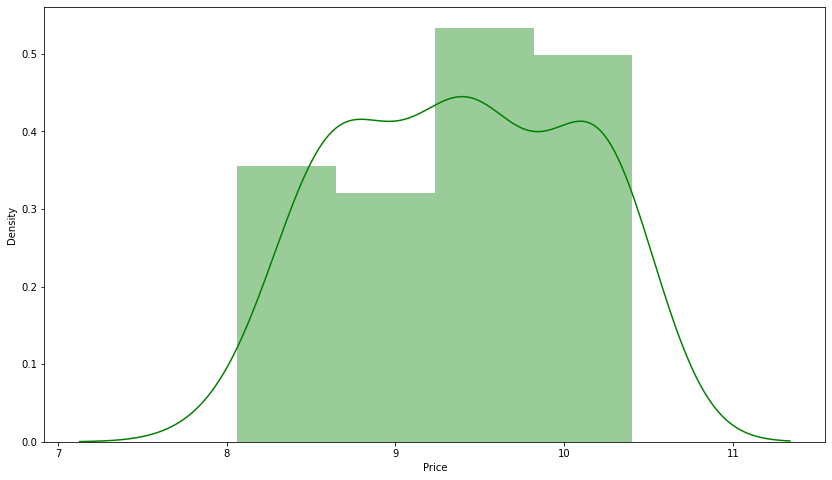

In [20]:
plt.figure(figsize = (14,8))
sns.distplot(df_rice.Price, color = 'green')

In [21]:
df_WheaflourRetai_rice.Price.describe()

count    96.000000
mean      6.535241
std       2.910502
min       3.067200
25%       3.776525
50%       6.166000
75%       9.428675
max      10.404300
Name: Price, dtype: float64

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

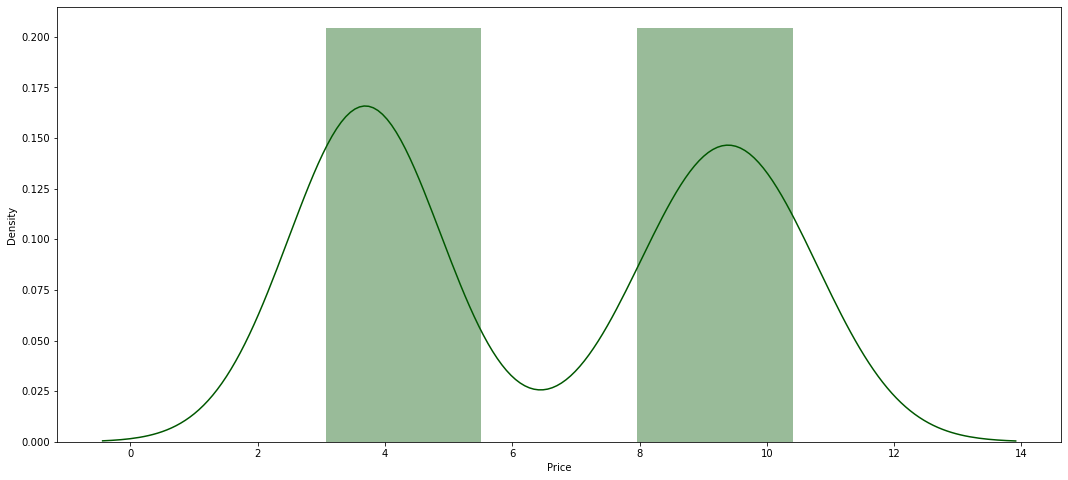

In [22]:
plt.figure(figsize = (18,8))
sns.distplot(df_WheaflourRetai_rice.Price, color = '#005700')

In [23]:
df_rice1.Price.describe()

count    15.000000
mean     25.556427
std      16.123684
min       5.509900
25%       9.003750
50%      26.001300
75%      38.416150
max      50.444000
Name: Price, dtype: float64

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

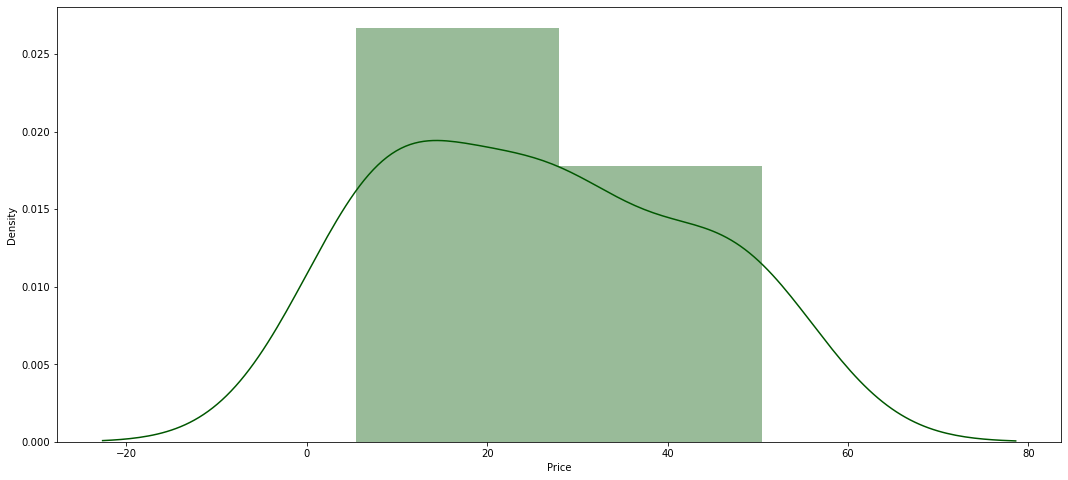

In [24]:
plt.figure(figsize = (18,8))
sns.distplot(df_rice1.Price, color = '#005700')

# Bước 3:

#  với mức ý nghĩa 5% kiểm định giả thuyết giá bán gạo trung bình năm 2019 là 10 Lira/kg
+ dựa vào mức ý nghĩa tính z-score
+ giả thiết Ho = 10 lira/ kg H1 != 10 
+ a = 0.05 => p = 1 -0.05 = 0.95 => z = 1645

In [25]:
stats.ttest_1samp(df_rice.Price, 9.5)

Ttest_1sampResult(statistic=-1.1854023812590566, pvalue=0.24181730968913567)

# 2. Với mức ý nghĩa 5% hãy kiểm định giả thuyết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau

In [26]:
price = df_WheaflourRetai_rice.loc[df_WheaflourRetai_rice['ProductName'] == 'Rice - Retail',]

In [27]:
wheat = df_WheaflourRetai_rice.loc[df_WheaflourRetai_rice['ProductName'] == 'Wheat flour - Retail',]

In [28]:
price.head()

,ProductName,Month,Year,Price
54,Rice - Retail,1,2019,8.4275
55,Rice - Retail,2,2019,8.7656
56,Rice - Retail,3,2019,8.8101
57,Rice - Retail,4,2019,8.9266
58,Rice - Retail,5,2019,9.1866


In [29]:
wheat.head()

,ProductName,Month,Year,Price
120,Wheat flour - Retail,1,2019,3.5069
121,Wheat flour - Retail,2,2019,3.4963
122,Wheat flour - Retail,3,2019,3.5575
123,Wheat flour - Retail,4,2019,3.6129
124,Wheat flour - Retail,5,2019,3.5917


In [35]:
df2 = pd.DataFrame({'rice': list(price['Price']),
                     'wheat': list(wheat['Price'])})

<AxesSubplot:>

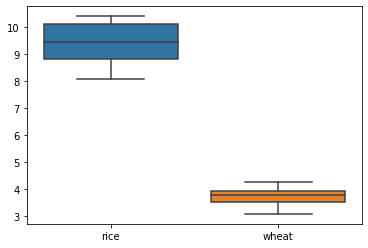

In [36]:
sns.boxplot(data = df2)

In [38]:
stats.ttest_ind(df2['rice'], df2['wheat'], equal_var=False)

Ttest_indResult(statistic=53.7516920363042, pvalue=7.11046528586048e-55)

+ kết luận: vì pvalue < a <=> 7.11046528586048e-55 < 5% nên giả thiết H0 bị bác bỏ

# 3. Vẽ biểu đồ sự biến đổi giá gạo trung bình từ năm 1/2014 đến năm 1/2019 và tìm mối liên hệ giữa giá Trà và giá Cà phê

In [39]:
rice1 = df_rice1.loc[df_rice1['ProductName'] == 'Rice - Retail',:]

In [41]:
cooffe = df_rice1.loc[df_rice1['ProductName'] == 'Coffee - Retail']

In [59]:
tea = df_rice1.loc[df_rice1['ProductName'] == 'Tea - Retail']

In [60]:
rice1.head()

,ProductName,Month,Year,Price
4,Rice - Retail,1,2014,5.5099
54,Rice - Retail,1,2019,8.4275
2657,Rice - Retail,1,2019,8.0617
4239,Rice - Retail,1,2019,8.8745
5822,Rice - Retail,1,2019,9.1330


In [68]:
lst = pd.DataFrame()
name = [rice1, cooffe, tea]

for i in range(len(name)):
    dfy = name[i].groupby('Year').sum()
    dfy = dfy.reset_index()
    lst = pd.concat([lst,dfy], ignore_index = True)

In [69]:
lst.head()

,Year,Month,Price
0,2014,1,5.5099
1,2019,4,34.4967
2,2014,1,31.2607
3,2019,4,189.8043
4,2014,1,15.2072


In [70]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    6 non-null      int64  
 1   Month   6 non-null      int64  
 2   Price   6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 272.0 bytes


In [71]:
data = pd.DataFrame({'productName': list(['Rice', 'cooffe', 'tea']),
                      '2014': list(lst.loc[lst['Year'] == 2014, 'Price']),
                    '2019': list(lst.loc[lst['Year'] == 2019, 'Price'])})

In [72]:
data.head()

,productName,2014,2019
0,Rice,5.5099,34.4967
1,cooffe,31.2607,189.8043
2,tea,15.2072,107.0676


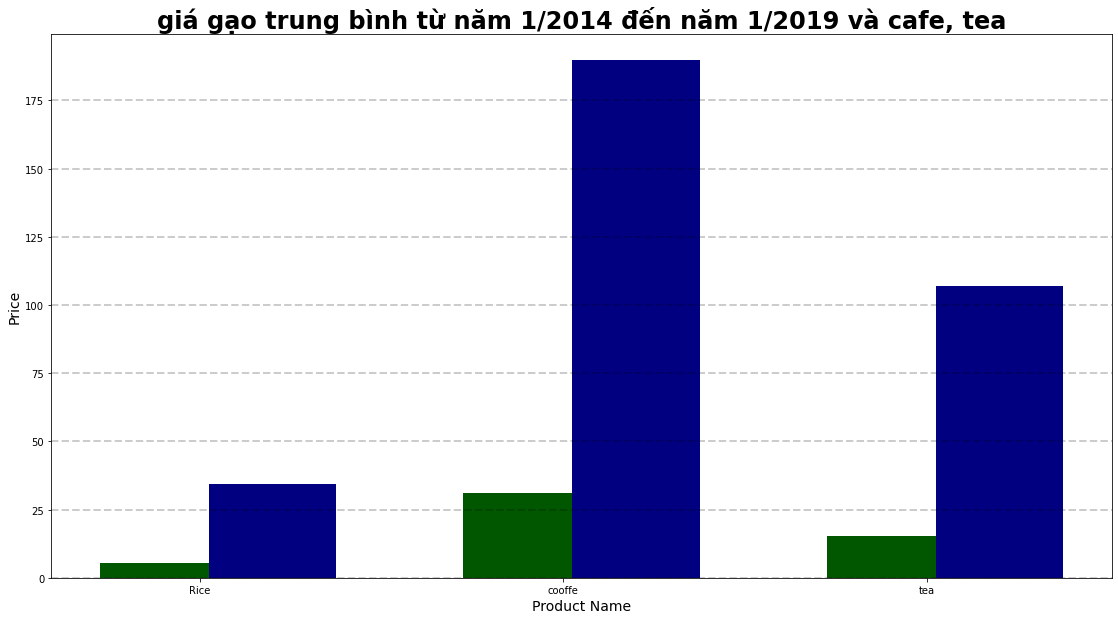

In [77]:
plt.figure( figsize = (19,10))
x = np.arange(len(data['productName']))
width = 0.35
plt.bar(x- 0.1, list(data['2014']), width, color = '#005700')

plt.bar(x+ 0.2, list(data['2019']), width, color = '#000080')


plt.grid(color='black', linestyle='--', linewidth=2, axis='y', alpha=0.2)
plt.xticks(x, list(data['productName']))
plt.title("giá gạo trung bình từ năm 1/2014 đến năm 1/2019 và cafe, tea",  fontsize = 24, fontweight ='bold')
plt.ylabel("Price", fontsize = 14)
plt.xlabel('Product Name', fontsize = 14)
plt.show()